## CTA Project 2020 

### Submitted by G00273895 John Dunne 

I have included in this notebook the code for the five sorting algorithms to be implemented in this project. Sourced from online resources which are provided and added my own comments.

Followed by benchmarking section where all five sorting algotihms are ran ten times each on randomly generated arrays and the average time of the the ten runs will be output in a pandas dataframe.

Go to Kernel in the toolbar and click Restart & run all to run all code in this notebook

### 1. Bubble Sort
   

In [1]:
# Code sourced from: https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheBubbleSort.html
# Added my own comments
# Bubble Sort has the capability to stop running when the list becomes sorted

# Bubble sort function is created taking one input
def bubbleSort(alist):
    # A variable called exchanges is created and set to true 
    exchanges = True
    # the variable passnum is set to the size of the input array minus 1 
    passnum = len(alist)-1
    # while loop executes while there is more than one element in the array and there are exchanges to be made
    while passnum > 0 and exchanges:
        # exchanges set to false at beginning of the loop
        exchanges = False
        # An inner for loop traverses each element in passnum array
        for i in range(passnum):
            # if the element on the left is greater than the element on the right then we must swap positions and set exchanges to boolean true
            if alist[i]>alist[i+1]:
                exchanges = True
                # the element on the left is stored in a temporary variable
                temp = alist[i]
                # element on the left set equal to the element on its right
                alist[i] = alist[i+1]
                # the element that was originally on the left is moved from temp storage to the right position
                alist[i+1] = temp
                # Without the temp storage the left would be overwritten 
        # the new value od passnum is the previous array length minus 1 as we one less element to sort
        passnum = passnum-1

**Testing the Bubble Sort**

Commented out

In [2]:
#alist= [54,26,93,17,77,31,44,55,20]
#bubbleSort(alist)
#print(alist)

### 2. Merge Sort

In [3]:
# Code sourced from: https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheMergeSort.html
# Added my own comments

# Merge sort function created taking a list as input
# First half of the code concerned with splitting the lists into sub-lists
def mergeSort(alist):
    # print statement prints out the result of splitting the list into sub-lists, will comment out later
    #print("Splitting ",alist)
    # if statement will execute on lists with more than one element
    if len(alist)>1:
        # mid point of the list found 
        mid = len(alist)//2
        # list sliced into left and right halves or sub-lists
        # left half contains from start of list to mid point and right half from mid point to the end of list
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        # mergeSort function is called on both halves to sort the lists
        mergeSort(lefthalf)
        mergeSort(righthalf)
        # The sub-lists are now sorted

        # From here on the code is concerned with merging the smaller sorted lists into a final sorted list
        i=0
        j=0
        k=0
        # While loops executes as long as both sub-lists contain at least one element
        while i < len(lefthalf) and j < len(righthalf):
            # if the element in the left half is less or equal to than the element in the right half it is stored in alist k
            # this ensures the algorithm is stable as for elements with equal sort keys the element for the left half is places on the left
            if lefthalf[i] <= righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            # else statement executes if element on left half is not less than or equal to element in right half
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1
            # the values of i, j and k are incremented after the execution of the relevant section of code
        # The above while loop will execute as long as both sub-lits contain at least one element
        # In the case of uneven numbers then one sub-list may have an element left and the other wll be empty
        # Two additional while loops are added to deal with these cases

        # This while loop will execute as long as there is an element present in the left half sub-list
        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1
        # This while loop will execute as long as there is an element present in the right half of the sub-list
        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    # print statement that shows the merging process in progress, will comment out later
   # print("Merging ",alist)

**Testing Merge Sort**

In [4]:
# Testing the algorithm
#alist = [54,26,93,17,77,31,44,55,20]
#mergeSort(alist)
#print(alist)

### 3. Counting Sort

In [5]:
#Code sourced from: https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php
# Added my own comments
# I found it hard to find good examples of this sorting algorithm online 
# I had to change the function to only take an array as input as I wont be entering a max val when benchmarking 

# In the source code the function accepts:
#def counting_sort(array1, max_val):
    #m = max_val + 1

def counting_sort(array1):
# I changed the sourced code to have a set max val of 100 
# I chose this as I am generating random integers up to 100 in the benchmarking
    m = 100 + 1   # array created of size of range on input plus one 
    count = [0] * m                
    
    for a in array1:
    # for loop loops through input array and counts number of occurrences 
    # the count is stored used a counter
        count[a] += 1             
    i = 0
    for a in range(m):            
        for c in range(count[a]):  
            array1[i] = a
            i += 1
    return array1


**Testing Counting Sort**

In [6]:
#print(counting_sort( [1, 2, 7, 3, 2, 1, 4, 2, 3, 2, 1], 7 ))

### 4. Insertion Sort

In [7]:
# Code sourced from: https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheInsertionSort.html
#Added my own comments

# Create an insertion sort function
def insertionSort(alist):
    # for loop to iterate over the list from index 1 to the end of the list
    # we need n-1 passes to sort an input size n 
   for index in range(1,len(alist)):
    # the position of the current item in the list is stored as currentvalue
     currentvalue = alist[index]
     position = index
    # while loop checks the index of the element is greater than index zero
    # The current element is compared to the element to its left
    # if the position to its left is less than a shift operation will be made
     while position>0 and alist[position-1]>currentvalue:
         # this is the shift operation that moves the element back at each iteration of the while loop
         # an element on the right that is less than an element on the left when compared is shifted to the left
         alist[position]=alist[position-1]
         # Note the variable position holds the new value of the sorted sub list
         # This is not a complete exchange
         position = position-1
    # The sorted sublist is held in the variable position and this is now set equal to alist
     alist[position]=currentvalue

**Testing Insertion Sort**

In [8]:
# Testing the algorithm
#alist = [54,26,93,17,77,31,44,55,20]
#insertionSort(alist)
#print(alist)

### 5. Selection Sort

In [9]:
#sourced from: https://stackabuse.com/sorting-algorithms-in-python/#selectionsort
#Have to add my own comments

def selection_sort(nums):
    # This value of i corresponds to how many values were sorted
    for i in range(len(nums)):
        # We assume that the first item of the unsorted segment is the smallest
        lowest_value_index = i
        # This loop iterates over the unsorted items
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j
        # Swap values of the lowest unsorted element with the first unsorted
        # element
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]




In [10]:
# Testing the algorithm
#random_list_of_nums = [12, 8, 3, 20, 11]
#selection_sort(random_list_of_nums)
#print(random_list_of_nums)

### 6. Benchmarking the five sorting algorithms

I have broken the benchmarking process into five smaller tasks:

#### 6.1 - Run each algorithm ten times for each input size and calculate the average run time of the ten runs

In [11]:
import time   # will be used to time the sorting algorithms
import random #will be used to generate random arrays of integers
import pandas as pd # will be used to output the results nicely
import numpy as np # will use numpy.mean to return the average of an array of ten run times
import matplotlib.pyplot as plt #will be used to generate a plot of the data

# create a function to generate random array of integers
# sourced from sample given in the project specification
# Python random module: https://docs.python.org/3/library/random.html
def random_array(n):
    array = []
    for i in range(0, n, 1): # low, high, size 
        array.append(random.randint(0, 100))  # randomly generated arrays will contain integers in range 100
    return array
    
# I will create an array of input sizes to be called in the random array function    
testing_arrays= [100, 250, 500, 750, 1000] # shorter list for testing
#testing_arrays = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 7500, 8750, 10000]

average_bubble = [] # Create a container to hold the average time of ten runs
average_merge = [] # I will append the average of the ten runs for each input size to this container
average_counting = []
average_insertion = []
average_selection = []
    
# for loop will loop through input size array & each input size will be used as input to the random array function
for array in testing_arrays:
    benchmark_array = random_array(array) 
        # I will generate just one array for each input size and pass a copy of the array to the sorting algorithms
        # https://stackoverflow.com/questions/2612802/how-to-clone-or-copy-a-list
        # this will be necessary to avoid passing an already sorted array to an algorithm on runs 2 through 10
        
    bubble_time = []  #container to hold running times for ten runs of each algorithm
    merge_time = [] # time for each run will be appeneded to this container
    counting_time = []
    insertion_time = []
    selection_time = []
    
    # for loop to loop through each input size ten times for the purpose of timing the algorithm ten times
    for runs in range (10):        
        #the first sorting algorithm will be timed using the Python time module 
        start_time = time.time()  #current time in seconds 
        bubbleSort(list(benchmark_array)) #copied array passed into Bubble Sort algorithm
        finish_time = time.time()  #current time in seconds 
        time_elapsed = finish_time - start_time #time elapsed will be the difference between the start & finish times
        #print(time_elapsed) testing purposes, comment out
        bubble_time.append(time_elapsed)  #append the time to the container set up to hold the run times
        
        #repeat same procedure for the remaining 4 sorting algorithms:
        
        #Merge Sort time
        start_time = time.time()
        mergeSort(list(benchmark_array))
        finish_time = time.time()
        time_elapsed = finish_time - start_time
        #print(time_elapsed)
        merge_time.append(time_elapsed)
            
        #Counting sort time
        start_time = time.time()
        counting_sort(list(benchmark_array))
        finish_time = time.time()
        time_elapsed = finish_time - start_time
        #print(time_elapsed)
        counting_time.append(time_elapsed)
            
        #Insertion sort time
        start_time = time.time()
        insertionSort(list(benchmark_array))
        finish_time = time.time()
        time_elapsed = finish_time - start_time
        #print(time_elapsed)
        insertion_time.append(time_elapsed)
            
        #Selection sort time
        start_time = time.time()
        selection_sort(list(benchmark_array))
        finish_time = time.time()
        time_elapsed = finish_time - start_time
        #print(time_elapsed)
        selection_time.append(time_elapsed)
    
    #print for testing purposes, comment out 
    #print(bubble_time)
    #print(merge_time)
    #print(counting_time)
    #print(insertion_time)
    #print(selection_time)
    
    # I will use numpy.mean to return the average of the array holding the 10 run times
    # numpy.mean: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html
    #mutiply by 1000 to convert seconds to milliseconds 
    average_time_bubble_sort = np.mean(bubble_time)*1000
    average_bubble.append(average_time_bubble_sort)  #append the average time for each input size to the average time container
    #print(f"Average time for Bubble Sort on Input Size {array} : {average_time_bubble_sort}") 
    # print for testing purposes, comment out later
    
    average_time_merge_sort = np.mean(merge_time)*1000
    average_merge.append(average_time_merge_sort)
    #print(f"Average time for Merge Sort on Input Size {array} : {average_time_merge_sort}")
        
    average_time_counting_sort = np.mean(counting_time)*1000
    average_counting.append(average_time_counting_sort)
    #print(f"Average time for Counting Sort on Input Size {array} : {average_time_counting_sort}")
        
    average_time_insertion_sort = np.mean(insertion_time)*1000
    average_insertion.append(average_time_insertion_sort)
    #print(f"Average time for Insertion Sort on Input Size {array} : {average_time_insertion_sort}")
        
    average_time_selection_sort = np.mean(selection_time)*1000
    average_selection.append(average_time_selection_sort)
    #print(f"Average time for Selection Sort on Input Size {array} : {average_time_selection_sort}")
        
#print out the array containing the average run for all input sizes, cross check against pandas dataframe for testing   
print(f"Average time Bubble {average_bubble}")
print(f"Average time Merge {average_merge}")
print(f"Average time Counting{average_counting}")
print(f"Average time Insertion {average_insertion}")
print(f"Average time Selection {average_selection}")

#Next step to create pandas dataframe

Average time Bubble [2.3955583572387695, 14.67752456665039, 63.80071640014648, 156.9521188735962, 281.95722103118896]
Average time Merge [0.7986783981323242, 2.396678924560547, 4.991888999938965, 8.486700057983398, 11.182665824890137]
Average time Counting[0.1996755599975586, 0.1001119613647461, 0.1999378204345703, 0.099945068359375, 0.49908161163330084]
Average time Insertion [1.298379898071289, 7.486748695373535, 33.24730396270752, 81.07366561889648, 144.47221755981445]
Average time Selection [0.998711585998535, 6.4899444580078125, 28.954172134399414, 68.09384822845459, 120.11165618896484]


#### 6.2 Create a pandas dataframe

In [12]:
df_average_times = pd.DataFrame() #create a pandas dataframe
df_average_times['Input Size'] = testing_arrays #add columns to the pandas dataframe
df_average_times['Bubble Sort'] = average_bubble
df_average_times['Merge Sort'] = average_merge
df_average_times['Counting Sort'] = average_counting
df_average_times['Insertion Sort'] = average_insertion
df_average_times['Selection Sort'] = average_selection
df_average_times.set_index('Input Size', inplace=True) #set the index as the input size 
#df_average_times.round(3) show dataframe for testing, comment out
#display the dataframe & round to 3 decimal places: https://www.geeksforgeeks.org/python-pandas-dataframe-round/
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html

#### 6.3 Transpose the pandas dataframe and display with average times rounded to 3 decimal places

In [13]:
df_average_times.round(3).T
# transpose dataframe: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
# https://www.geeksforgeeks.org/python-pandas-dataframe-transpose/
#round dataframe output to 3 decimal places: https://www.geeksforgeeks.org/python-pandas-dataframe-round/

Input Size,100,250,500,750,1000
Bubble Sort,2.396,14.678,63.801,156.952,281.957
Merge Sort,0.799,2.397,4.992,8.487,11.183
Counting Sort,0.200,0.100,0.200,0.100,0.499
Insertion Sort,1.298,7.487,33.247,81.074,144.472
Selection Sort,0.999,6.490,28.954,68.094,120.112


#### 6.4 Send the data from the pandas dataframe to a csv file

In [14]:
df_average_times.round(3).to_csv('Benchmark_Results.csv') 
#send data from dataframe to a csv file: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

#### 6.5 Plot the data

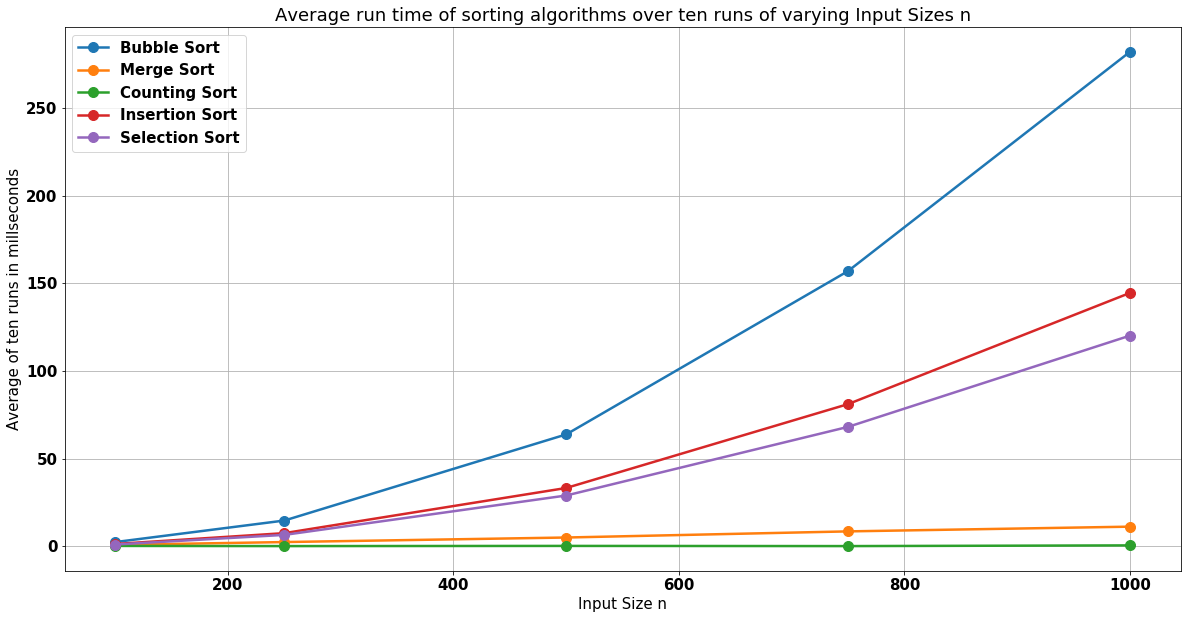

In [15]:
#Plot the average run times from the pandas dataframe
#matplotlib pyplot documentation: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html

# rc params to customize plot appearance: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.size'] = 15.0
plt.rcParams['font.weight'] = 'bold'

# add the columns of data to the plot from the pandas dataframe 
#pyplot;plot: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
plt.plot(df_average_times['Bubble Sort'], marker='o', markersize=10)  #add marker to show each input size on the lines
plt.plot(df_average_times['Merge Sort'], marker='o', markersize=10)
plt.plot(df_average_times['Counting Sort'], marker='o', markersize=10)
plt.plot(df_average_times['Insertion Sort'], marker='o', markersize=10)
plt.plot(df_average_times['Selection Sort'], marker='o', markersize=10)

# add a title to the plot: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title
plt.title('Average run time of sorting algorithms over ten runs of varying Input Sizes n')

# add labels to x and y axis : https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel
plt.xlabel('Input Size n')
plt.ylabel('Average of ten runs in millseconds')

# add a grid: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html#matplotlib.pyplot.grid
plt.grid()
# add a legend: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend
plt.legend()
# pyplot.show to display the plot: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show
plt.show()